In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk
import tensorflow as tf

In [4]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [19]:
#importing dataset
dataLabelled =  pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'])
print(dataLabelled)


          id  clump_thickness  uniformity_of_cell_size  \
0    1000025                5                        1   
1    1002945                5                        4   
2    1015425                3                        1   
3    1016277                6                        8   
4    1017023                4                        1   
..       ...              ...                      ...   
694   776715                3                        1   
695   841769                2                        1   
696   888820                5                       10   
697   897471                4                        8   
698   897471                4                        8   

     uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1            

In [12]:
# checking the types of features
dataLabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [14]:
dataLabelled.shape

(699, 11)

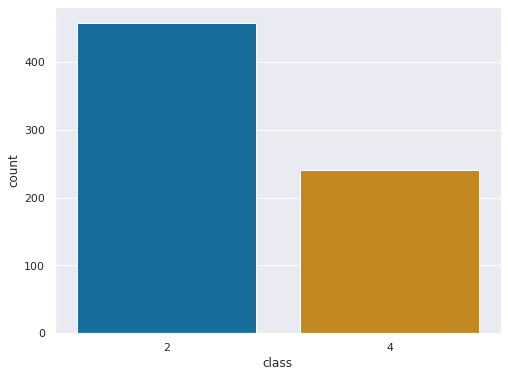

In [17]:
#plotting the benign and malicioud diagnosis 
plt.figure(figsize = (8,6))
sns.countplot(x = 'class', data = dataLabelled)

Text(0.5, 1.0, 'Correlation Map')

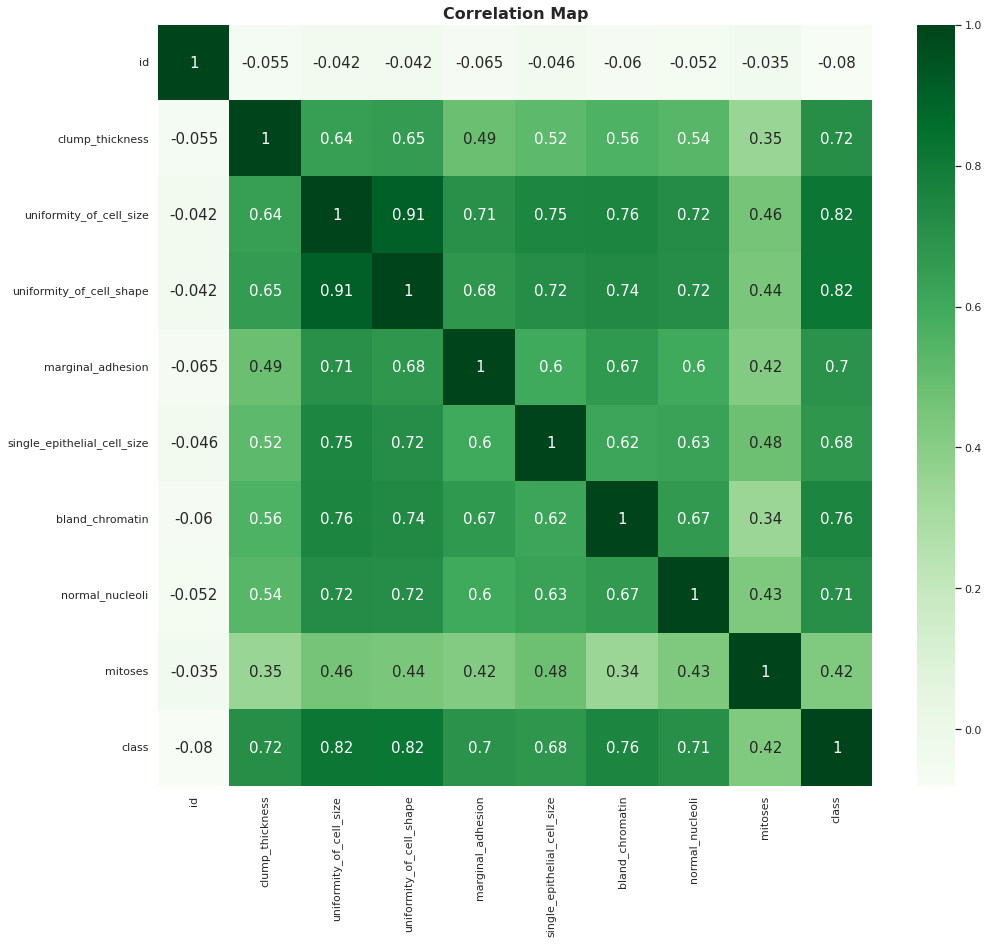

In [18]:
#creating a confusion matrix
plt.figure(figsize=(16,14))
sns.heatmap(dataLabelled.corr(), cmap='Greens', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [20]:
#defining dependent and independent variables
x = dataLabelled.drop('class', axis=1)
y = dataLabelled['class']